In [2]:
!pip install pymongo

     |████████████████████████████████| 506 kB 22.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 22.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install tweepy

     |████████████████████████████████| 63 kB 242 kB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 66.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install twitter

     |████████████████████████████████| 50 kB 8.0 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [8]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [9]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [13]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [14]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 03 20:26:57 +0000 2021'
'Wed Nov 03 20:26:57 +0000 2021'
'Wed Nov 03 20:26:57 +0000 2021'
'Wed Nov 03 20:26:56 +0000 2021'
'Wed Nov 03 20:26:56 +0000 2021'
'Wed Nov 03 20:26:56 +0000 2021'
'Wed Nov 03 20:26:56 +0000 2021'
'Wed Nov 03 20:26:55 +0000 2021'
'Wed Nov 03 20:26:55 +0000 2021'
'Wed Nov 03 20:26:54 +0000 2021'
'Wed Nov 03 20:26:54 +0000 2021'
'Wed Nov 03 20:26:53 +0000 2021'
'Wed Nov 03 20:26:53 +0000 2021'
'Wed Nov 03 20:26:52 +0000 2021'
'Wed Nov 03 20:26:52 +0000 2021'
'Wed Nov 03 20:26:51 +0000 2021'
'Wed Nov 03 20:26:51 +0000 2021'
'Wed Nov 03 20:26:51 +0000 2021'
'Wed Nov 03 20:26:50 +0000 2021'
'Wed Nov 03 20:26:49 +0000 2021'
'Wed Nov 03 20:26:48 +0000 2021'
'Wed Nov 03 20:26:48 +0000 2021'
'Wed Nov 03 20:26:48 +0000 2021'
'Wed Nov 03 20:26:48 +0000 2021'
'Wed Nov 03 20:26:46 +0000 2021'
'Wed Nov 03 20:26:46 +0000 2021'
'Wed Nov 03 20:26:45 +0000 2021'
'Wed Nov 03 20:26:45 +0000 2021'
'Wed Nov 03 20:26:45 +0000 2021'
'Wed Nov 03 20:26:45 +0000 2021'
'Wed Nov 0

In [15]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Nov 03 20:26:12 +0000 2021'
'Wed Nov 03 20:26:12 +0000 2021'
'Wed Nov 03 20:26:11 +0000 2021'
'Wed Nov 03 20:26:11 +0000 2021'
'Wed Nov 03 20:26:11 +0000 2021'
'Wed Nov 03 20:26:10 +0000 2021'
'Wed Nov 03 20:26:10 +0000 2021'
'Wed Nov 03 20:26:10 +0000 2021'
'Wed Nov 03 20:26:09 +0000 2021'
'Wed Nov 03 20:26:09 +0000 2021'
'Wed Nov 03 20:26:09 +0000 2021'
'Wed Nov 03 20:26:08 +0000 2021'
'Wed Nov 03 20:26:07 +0000 2021'
'Wed Nov 03 20:26:06 +0000 2021'
'Wed Nov 03 20:26:05 +0000 2021'
'Wed Nov 03 20:26:05 +0000 2021'
'Wed Nov 03 20:26:05 +0000 2021'
'Wed Nov 03 20:26:05 +0000 2021'
'Wed Nov 03 20:26:05 +0000 2021'
'Wed Nov 03 20:26:05 +0000 2021'
'Wed Nov 03 20:26:04 +0000 2021'
'Wed Nov 03 20:26:04 +0000 2021'
'Wed Nov 03 20:26:02 +0000 2021'
'Wed Nov 03 20:26:02 +0000 2021'
'Wed Nov 03 20:26:00 +0000 2021'
'Wed Nov 03 20:26:00 +0000 2021'
'Wed Nov 03 20:26:00 +0000 2021'
'Wed Nov 03 20:25:59 +0000 2021'
'Wed Nov 03 20:25:58 +0000 2021'
'Wed Nov 03 20:25:57 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:24:07 +0000 2021'
'Wed Nov 03 20:24:06 +0000 2021'
'Wed Nov 03 20:24:06 +0000 2021'
'Wed Nov 03 20:24:05 +0000 2021'
'Wed Nov 03 20:24:05 +0000 2021'
'Wed Nov 03 20:24:05 +0000 2021'
'Wed Nov 03 20:24:04 +0000 2021'
'Wed Nov 03 20:24:04 +0000 2021'
'Wed Nov 03 20:24:03 +0000 2021'
'Wed Nov 03 20:24:03 +0000 2021'
'Wed Nov 03 20:24:03 +0000 2021'
'Wed Nov 03 20:24:03 +0000 2021'
'Wed Nov 03 20:24:03 +0000 2021'
'Wed Nov 03 20:24:03 +0000 2021'
'Wed Nov 03 20:24:02 +0000 2021'
'Wed Nov 03 20:24:02 +0000 2021'
'Wed Nov 03 20:24:00 +0000 2021'
'Wed Nov 03 20:24:00 +0000 2021'
'Wed Nov 03 20:24:00 +0000 2021'
'Wed Nov 03 20:23:59 +0000 2021'
'Wed Nov 03 20:23:59 +0000 2021'
'Wed Nov 03 20:23:58 +0000 2021'
'Wed Nov 03 20:23:58 +0000 2021'
'Wed Nov 03 20:23:57 +0000 2021'
'Wed Nov 03 20:23:57 +0000 2021'
'Wed Nov 03 20:23:57 +0000 2021'
'Wed Nov 03 20:23:56 +0000 2021'
'Wed Nov 03 20:23:56 +0000 2021'
'Wed Nov 03 20:23:56 +0000 2021'
'Wed Nov 03 20:23:56 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:22:03 +0000 2021'
'Wed Nov 03 20:22:02 +0000 2021'
'Wed Nov 03 20:22:02 +0000 2021'
'Wed Nov 03 20:22:02 +0000 2021'
'Wed Nov 03 20:22:02 +0000 2021'
'Wed Nov 03 20:22:01 +0000 2021'
'Wed Nov 03 20:22:01 +0000 2021'
'Wed Nov 03 20:22:00 +0000 2021'
'Wed Nov 03 20:22:00 +0000 2021'
'Wed Nov 03 20:21:59 +0000 2021'
'Wed Nov 03 20:21:58 +0000 2021'
'Wed Nov 03 20:21:58 +0000 2021'
'Wed Nov 03 20:21:58 +0000 2021'
'Wed Nov 03 20:21:57 +0000 2021'
'Wed Nov 03 20:21:56 +0000 2021'
'Wed Nov 03 20:21:56 +0000 2021'
'Wed Nov 03 20:21:56 +0000 2021'
'Wed Nov 03 20:21:54 +0000 2021'
'Wed Nov 03 20:21:54 +0000 2021'
'Wed Nov 03 20:21:54 +0000 2021'
'Wed Nov 03 20:21:54 +0000 2021'
'Wed Nov 03 20:21:54 +0000 2021'
'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:51 +0000 2021'
'Wed Nov 03 20:21:51 +0000 2021'
'Wed Nov 03 20:21:51 +0000 2021'
'Wed Nov 03 20:21:51 +0000 2021'
'Wed Nov 03 20:21:51 +0000 2021'
'Wed Nov 03 20:21:50 +0000 2021'
'Wed Nov 03 20:21:50 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:20:03 +0000 2021'
'Wed Nov 03 20:20:03 +0000 2021'
'Wed Nov 03 20:20:03 +0000 2021'
'Wed Nov 03 20:20:03 +0000 2021'
'Wed Nov 03 20:20:03 +0000 2021'
'Wed Nov 03 20:20:02 +0000 2021'
'Wed Nov 03 20:20:02 +0000 2021'
'Wed Nov 03 20:20:01 +0000 2021'
'Wed Nov 03 20:20:01 +0000 2021'
'Wed Nov 03 20:20:01 +0000 2021'
'Wed Nov 03 20:20:00 +0000 2021'
'Wed Nov 03 20:20:00 +0000 2021'
'Wed Nov 03 20:20:00 +0000 2021'
'Wed Nov 03 20:20:00 +0000 2021'
'Wed Nov 03 20:20:00 +0000 2021'
'Wed Nov 03 20:19:59 +0000 2021'
'Wed Nov 03 20:19:59 +0000 2021'
'Wed Nov 03 20:19:59 +0000 2021'
'Wed Nov 03 20:19:58 +0000 2021'
'Wed Nov 03 20:19:58 +0000 2021'
'Wed Nov 03 20:19:58 +0000 2021'
'Wed Nov 03 20:19:57 +0000 2021'
'Wed Nov 03 20:19:56 +0000 2021'
'Wed Nov 03 20:19:55 +0000 2021'
'Wed Nov 03 20:19:54 +0000 2021'
'Wed Nov 03 20:19:54 +0000 2021'
'Wed Nov 03 20:19:52 +0000 2021'
'Wed Nov 03 20:19:52 +0000 2021'
'Wed Nov 03 20:19:52 +0000 2021'
'Wed Nov 03 20:19:52 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:18:07 +0000 2021'
'Wed Nov 03 20:18:07 +0000 2021'
'Wed Nov 03 20:18:06 +0000 2021'
'Wed Nov 03 20:18:05 +0000 2021'
'Wed Nov 03 20:18:05 +0000 2021'
'Wed Nov 03 20:18:04 +0000 2021'
'Wed Nov 03 20:18:03 +0000 2021'
'Wed Nov 03 20:18:03 +0000 2021'
'Wed Nov 03 20:18:03 +0000 2021'
'Wed Nov 03 20:18:02 +0000 2021'
'Wed Nov 03 20:18:02 +0000 2021'
'Wed Nov 03 20:18:02 +0000 2021'
'Wed Nov 03 20:18:00 +0000 2021'
'Wed Nov 03 20:17:59 +0000 2021'
'Wed Nov 03 20:17:59 +0000 2021'
'Wed Nov 03 20:17:58 +0000 2021'
'Wed Nov 03 20:17:58 +0000 2021'
'Wed Nov 03 20:17:58 +0000 2021'
'Wed Nov 03 20:17:57 +0000 2021'
'Wed Nov 03 20:17:57 +0000 2021'
'Wed Nov 03 20:17:56 +0000 2021'
'Wed Nov 03 20:17:56 +0000 2021'
'Wed Nov 03 20:17:55 +0000 2021'
'Wed Nov 03 20:17:54 +0000 2021'
'Wed Nov 03 20:17:53 +0000 2021'
'Wed Nov 03 20:17:52 +0000 2021'
'Wed Nov 03 20:17:51 +0000 2021'
'Wed Nov 03 20:17:51 +0000 2021'
'Wed Nov 03 20:17:51 +0000 2021'
'Wed Nov 03 20:17:49 +0000 2021'
'Wed Nov 0

KeyboardInterrupt: 

In [16]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

1288
1161


In [17]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

In [20]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: BFHD
text: 11/3/2021 - COVID-19 Update*
Benton: 6 new COVID-19 cases; 29,095
Franklin: 1 new COVID-19 cases; 18,784
Total case… https://t.co/HVlb8InA3o
----
name: Covid-19 Ö-Watch
text: 🇦🇹 Jakob Pöltl im Covid-Protokoll der NBA? https://t.co/A7ybyL36VJ #covid #covid19 #corona
----
name: @COVID_Evidence
text: RT @COVID_Evidence: LitCovid:  COVID-19 "Green Pass": a Lesson on the Proportionality Principle from Galicia.: {'title': 'COVID-19 "Green P…
----
name: Marius
text: RT @FezileDabiDM: FEZILE DABI DISTRICT COVID-19 CASES UPDATE. 

The Fezile Dabi District COVID-19 cases UPDATE as of the 3rd of November 20…
----
name: Mr.Trampakoulas
text: Dati dell'Istituto Superiore di Sanità - Covid
https://t.co/NcilMlIdWn
----
name: Mary Hall
text: Covid-19 permanently closes Auckland International College https://t.co/5waH0i9gDj
----
name: Secoc-RS
text: Pfizer testa medicamento contra a covid-19 em brasileiros - https://t.co/v8FVIJbpV3
----
name: Investing.com Stocks
text: Qiagen Q3 p

In [33]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "health"}}) # return tweets contain vote

In [34]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,possibly_sensitive
0,6182f0eeaa29b0f5baa8f6a5,Wed Nov 03 20:21:09 +0000 2021,1455993473845321730,1455993473845321730,"RT @ONThealth: Ontario, in consultation with t...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",None,...,{'created_at': 'Wed Nov 03 17:14:19 +0000 2021...,False,32,0,False,False,en,NaN,NaN,NaN
1,6182f0e7aa29b0f5baa8f530,Wed Nov 03 20:24:05 +0000 2021,1455994212562898946,1455994212562898946,"RT @SkellyHamilton: Ontario, in consultation w...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,{'created_at': 'Wed Nov 03 20:09:44 +0000 2021...,False,1,0,False,False,en,NaN,NaN,NaN
2,6182f0e2aa29b0f5baa8f45b,Wed Nov 03 20:25:52 +0000 2021,1455994660757938177,1455994660757938177,RT @MoroccoWNews: The Minister of Health said ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,{'created_at': 'Wed Nov 03 20:25:42 +0000 2021...,False,1,0,False,False,en,NaN,NaN,NaN
3,6182f0f4aa29b0f5baa8f7d2,Wed Nov 03 20:18:46 +0000 2021,1455992872549986311,1455992872549986311,RT @NathanStall: This is a pathetic failure of...,False,"{'hashtags': [{'text': 'Ontario', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",None,...,{'created_at': 'Wed Nov 03 18:55:02 +0000 2021...,True,35,0,False,False,en,1.455967e+18,1455966669919117323,NaN
4,6182f0f2aa29b0f5baa8f77f,Wed Nov 03 20:19:26 +0000 2021,1455993041874046993,1455993041874046993,RT @NathanStall: This is a pathetic failure of...,False,"{'hashtags': [{'text': 'Ontario', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,{'created_at': 'Wed Nov 03 18:55:02 +0000 2021...,True,35,0,False,False,en,1.455967e+18,1455966669919117323,NaN
5,6182f0eeaa29b0f5baa8f6ae,Wed Nov 03 20:21:05 +0000 2021,1455993454585057283,1455993454585057283,RT @lambton_ph: Based on guidance from the Pro...,False,"{'hashtags': [{'text': 'ThirdDose', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,{'created_at': 'Wed Nov 03 19:44:34 +0000 2021...,False,3,0,False,False,en,NaN,NaN,NaN
6,6182f0eeaa29b0f5baa8f690,Wed Nov 03 20:21:18 +0000 2021,1455993508574253061,1455993508574253061,RT @NathanStall: This is a pathetic failure of...,False,"{'hashtags': [{'text': 'Ontario', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",None,...,{'created_at': 'Wed Nov 03 18:55:02 +0000 2021...,True,35,0,False,False,en,1.455967e+18,1455966669919117323,NaN
7,6182f0ecaa29b0f5baa8f654,Wed Nov 03 20:21:42 +0000 2021,1455993610760069124,1455993610760069124,RT @lambton_ph: Based on guidance from the Pro...,False,"{'hashtags': [{'text': 'ThirdDose', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,{'created_at': 'Wed Nov 03 19:44:34 +0000 2021...,False,3,0,False,False,en,NaN,NaN,NaN
8,6182f095aa29b0f5baa8f3d6,Wed Nov 03 20:26:53 +0000 2021,1455994917214380032,1455994917214380032,RT @picardonhealth: Quebec is backtracking on ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,{'created_at': 'Wed Nov 03 19:46:49 +0000 2021...,False,3,0,False,False,en,NaN,NaN,NaN
9,6182f0f

<AxesSubplot:>

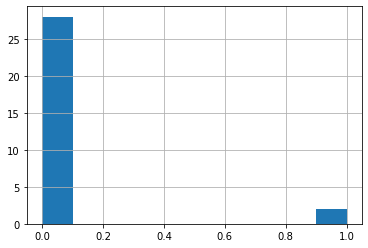

In [35]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count